<a href="https://colab.research.google.com/github/VR952004/DataAnalysisProjects/blob/main/FlightScheduleAnalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display .max_columns",500)
#plt.style.use("seaborn-colorblind")
#pal=sns.color_palette()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

link=f'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df=py.read_csv(link)

Mounted at /content/drive


In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,...,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,0,0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,...,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0
1,64,64,4/4/2022,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,...,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0
2,128,128,4/4/2022,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,...,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0
3,192,192,4/4/2022,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,...,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0
4,256,256,4/4/2022,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,...,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456148,29193472,29193472,1/10/2019,ExpressJet Airlines Inc.,4241,DCA,EWR,False,False,750,...,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,15.0,8.0,909,852.0,0.0
456149,29193536,29193536,1/11/2019,ExpressJet Airlines Inc.,4242,IAH,STL,True,False,1829,...,"Houston, TX",Texas,15016,"St. Louis, MO",Missouri,NaN,NaN,2035,NaN,NaN
456150,29193600,29193600,1/4/2019,ExpressJet Airlines Inc.,4245,ORD,BNA,False,False,1530,...,"Chicago, IL",Illinois,10693,"Nashville, TN",Tennessee,16.0,18.0,1712,1701.0,0.0
456151,29193664,29193664,1/18/2019,ExpressJet Airlines Inc.,4247,ORD,DSM,False,False,1010,...,"Chicago, IL",Illinois,11423,"Des Moines, IA",Iowa,18.0,4.0,1138,1218.0,40.0


In [ ]:
df.info()
#gives the number of non-null count and also the data type of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     456153 non-null  int64  
 1   Unnamed: 0                       456153 non-null  int64  
 2   FlightDate                       456153 non-null  object 
 3   Airline                          456153 non-null  object 
 4   Flight_Number_Marketing_Airline  456153 non-null  int64  
 5   Origin                           456153 non-null  object 
 6   Dest                             456153 non-null  object 
 7   Cancelled                        456153 non-null  bool   
 8   Diverted                         456153 non-null  bool   
 9   CRSDepTime                       456153 non-null  int64  
 10  DepTime                          444190 non-null  float64
 11  DepDelayMinutes                  444164 non-null  float64
 12  Or

In [ ]:
df.describe()
#gives statistical information

,Unnamed: 0.1,Unnamed: 0,Flight_Number_Marketing_Airline,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
count,4.561530e+05,4.561530e+05,456153.000000,456153.000000,444190.000000,444164.000000,456153.000000,456153.000000,443874.000000,443674.000000,456153.000000,443786.000000,442871.000000
mean,1.459686e+07,1.459686e+07,2690.791969,1325.420238,1328.120426,12.729965,12675.531629,12676.887972,16.719957,7.532700,1488.894654,1467.159946,12.756796
std,8.427531e+06,8.427531e+06,1838.030658,481.883155,494.788147,45.962705,1526.224402,1524.648750,9.415552,6.057943,506.787454,525.576363,45.447688
min,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000,10135.000000,10135.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,7.298432e+06,7.298432e+06,1099.000000,916.000000,918.000000,0.000000,11292.000000,11292.000000,11.000000,4.000000,1107.000000,1054.000000,0.000000
50%,1.459686e+07,1.459686e+07,2294.000000,1318.000000,1322.000000,0.000000,12889.000000,12889.000000,14.000000,6.000000,1515.000000,1503.000000,0.000000
75%,2.189530e+07,2.189530e+07,4252.000000,1730.000000,1735.000000,5.000000,14057.000000,14057.000000,19.000000,9.000000,1915.000000,1910.000000,6.000000
max,2.919373e+07,2.919373e+07,9677.000000,2359.000000,2400.000000,2366.000000,16869.000000,16869.000000,176.000000,222.000000,2400.000000,2400.000000,2341.000000


In [ ]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Unnamed: 0.1                     456153 non-null  int64   
 1   Unnamed: 0                       456153 non-null  int64   
 2   FlightDate                       456153 non-null  object  
 3   Airline                          456153 non-null  category
 4   Flight_Number_Marketing_Airline  456153 non-null  int64   
 5   Origin                           456153 non-null  category
 6   Dest                             456153 non-null  category
 7   Cancelled                        456153 non-null  bool    
 8   Diverted                         456153 non-null  bool    
 9   CRSDepTime                       456153 non-null  int64   
 10  DepTime                          444190 non-null  float64 
 11  DepDelayMinutes                  444164 non-null  fl

In [ ]:
df['FlightDate']=py.to_datetime(df['FlightDate'])

In [ ]:
df['FlightDate']=py.to_datetime(df['FlightDate'])

In [ ]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] <= 1, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 1) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

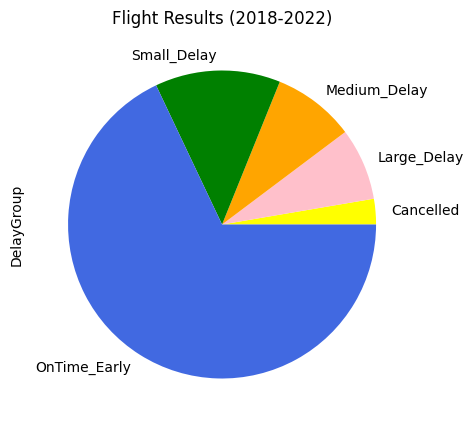

In [ ]:
vis3=df["DelayGroup"].value_counts(ascending=True)
vis3.plot(
    kind="pie", figsize=(10, 5), title="Flight Results (2018-2022)",colors=["yellow", "pink", "orange", "green", "royalblue"]
)
plt.show()

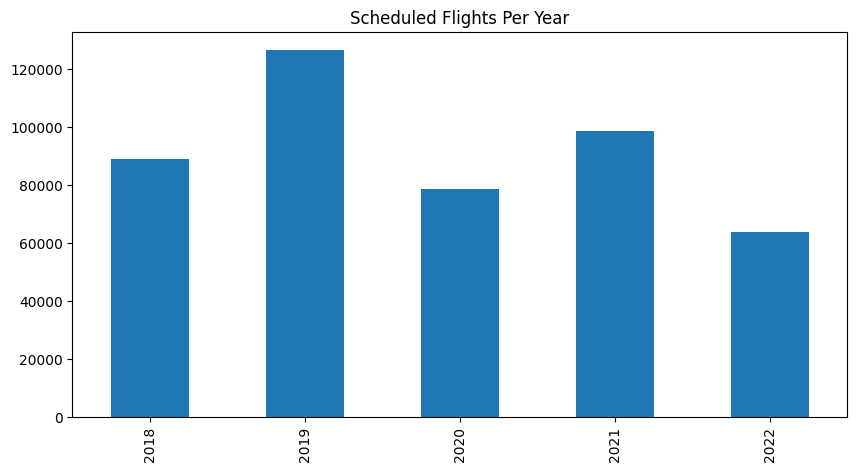

In [ ]:
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

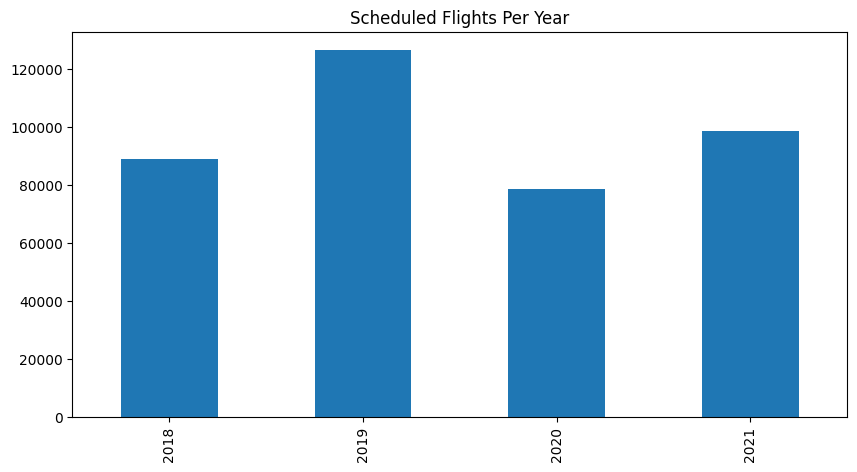

In [ ]:
df.query("Year != 2022")["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

In [ ]:
df_agg=df.groupby("Year")["DelayGroup"].value_counts().unstack()
print(df_agg)

DelayGroup  Cancelled  Large_Delay  Medium_Delay  OnTime_Early  Small_Delay
Year                                                                       
2018             1426         7395          8464         58922        12677
2019             2459        11040         11475         84248        17210
2020             4691         2901          3546         60912         6425
2021             1763         7159          8880         67091        13730
2022             1893         6038          7003         38801         9989


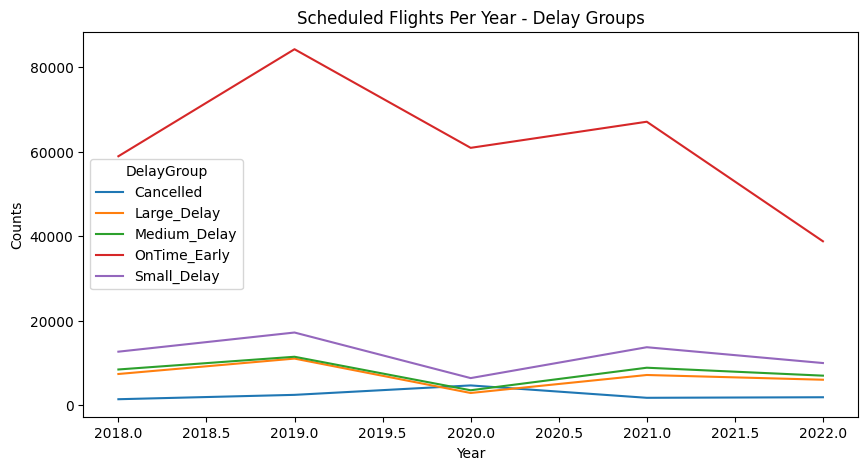

In [ ]:
# Plotting multiple line plots for each delay group
ax = df_agg.plot(kind="line", figsize=(10, 5))
ax.set_title("Scheduled Flights Per Year - Delay Groups")
ax.set_xlabel("Year")
ax.set_ylabel("Counts")
plt.show()

In [ ]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.290896,14.262409,9.522524,8.319833,1.604338
2019,66.635029,13.612060,9.076025,8.731967,1.944919
2020,77.619624,8.187321,4.518637,3.696719,5.977700
2021,68.027742,13.921702,9.003985,7.258956,1.787615
2022,60.889147,15.675413,10.989580,9.475237,2.970623


In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack()*100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Purples")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,70.024657,12.070274,7.833468,7.036844,3.034757
2,66.714898,13.175353,9.077507,7.879003,3.153239
3,68.422620,11.990106,7.739172,6.209203,5.638900
4,66.649005,12.179245,7.741024,6.721671,6.709056
5,66.868270,14.309349,9.061322,7.800168,1.960891
6,61.717905,15.033646,10.885341,10.492149,1.870959
7,64.072796,14.421316,9.925062,9.820388,1.760438
8,66.801492,13.012048,9.041882,8.961561,2.183018
9,74.878458,11.228151,6.609561,5.813752,1.470078


In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,69.096274,11.934583,8.051606,7.345324,3.572213
2,64.295542,13.795411,9.764623,8.266092,3.878333
3,68.195578,13.732685,8.999174,7.192001,1.880561
4,68.546304,13.625678,8.654265,7.513713,1.660040
5,65.374280,15.083419,9.638270,8.341946,1.562085
6,59.099684,15.786241,11.700012,11.389961,2.024102
7,60.607064,15.711921,10.885762,10.894040,1.901214
8,62.747084,14.262765,10.253545,10.295453,2.441154
9,72.641542,11.981756,7.383149,6.433250,1.560303


In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3<= Month <=4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Purples")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.471042,14.610039,9.722008,7.382239,1.814672
2019,68.066950,13.323904,8.359264,8.052805,2.197077
2020,64.261807,5.429528,3.235403,2.689971,24.383290
2021,78.605916,10.962258,5.691942,3.801428,0.938456
2022,61.858431,15.610823,11.238043,9.390544,1.902159


In [ ]:
df.isna().sum()

Unnamed: 0.1                           0
Unnamed: 0                             0
FlightDate                             0
Airline                                0
Flight_Number_Marketing_Airline        0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
DepTime                            11963
DepDelayMinutes                    11989
OriginAirportID                        0
OriginCityName                         0
OriginStateName                        0
DestAirportID                          0
DestCityName                           0
DestStateName                          0
TaxiOut                            12279
TaxiIn                             12479
CRSArrTime                             0
ArrTime                            12367
ArrDelayMinutes                    13282
DelayGroup                            15
Year            

In [ ]:
df.dropna(inplace=True)